In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.ar_model import AR,ARResults
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from pmdarima import auto_arima

In [227]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [176]:
%matplotlib inline
plt.style.use('ggplot')

In [5]:
df = pd.read_csv('sales-by-date-aug1-2017-oct31,2019.csv', index_col=0)

In [271]:
df_put = pd.read_csv('sales-by-date-feb26-2017-nov2,2019.csv', index_col = 0)

In [286]:
df_put.head(16)

,net_sales
03/14/2017,5120.50
03/15/2017,4105.00
03/16/2017,6941.00
03/17/2017,15053.39
03/18/2017,11338.50
03/19/2017,12033.31
03/20/2017,4352.21
03/21/2017,4861.96
03/22/2017,5150.45
03/23/2017,4128.84


In [273]:
df_put.drop(['Guests'], axis=1, inplace=True)

In [274]:
df_put = df_put.rename(columns={'Date' : 'net_sales', 'Net Sales': 'orders', 'Orders': 'guests'})

In [285]:
df_put.drop(df_put.head(16).index,inplace=True)

In [312]:
df_put.to_csv('put_sales.csv')

In [263]:
df.head()

,net_sales,30_day_sales_mean,Month,natural_log
2017-08-01,6728.97,NaN,8,8.814177
2017-08-02,8799.69,NaN,8,9.082472
2017-08-03,9432.39,NaN,8,9.151905
2017-08-04,13329.42,NaN,8,9.497729
2017-08-05,12139.54,NaN,8,9.404223


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 822 entries, 2017-08-01 to 2019-10-31
Data columns (total 3 columns):
net_sales            822 non-null float64
30_day_sales_mean    793 non-null float64
Month                822 non-null int64
dtypes: float64(2), int64(1)
memory usage: 25.7 KB


In [118]:
df.describe()

,net_sales,30_day_sales_mean,Month
count,822.000000,793.000000,822.000000
mean,8543.136995,8528.837106,6.802920
std,3934.748286,779.354376,3.354796
min,0.000000,6932.761000,1.000000
25%,5771.147500,7967.788000,4.000000
50%,7637.615000,8442.261333,7.000000
75%,10507.927500,9078.827000,10.000000
max,35505.170000,11035.985333,12.000000


In [144]:
df[df['net_sales'] == 0.0]

,net_sales,30_day_sales_mean,Month
2017-12-25,0.0,9243.474000,12
2018-11-22,0.0,8011.796667,11
2018-12-25,0.0,9633.113000,12


In [135]:
df1.describe() 

,net_sales
count,819.000000
mean,8574.430537
std,3907.732411
min,1413.420000
25%,5793.235000
50%,7650.600000
75%,10527.030000
max,35505.170000


In [10]:
#it shifts the names of the columns over, so lets fix that (I want to keep the date as the index col)
df.drop(['Guests'], axis=1, inplace=True)

In [11]:
df = df.rename(columns={'Date' : 'net_sales', 'Net Sales': 'orders', 'Orders': 'guests'})

In [276]:
df_put.drop(['orders','guests'], axis=1, inplace=True)

In [ ]:
df_put.index = pd.to_datetime(df_put.index)

In [290]:
df_put['day_of_week'] = df_put.index.weekday_name

In [291]:
df_put.head()

,net_sales,day_of_week
2017-03-14,5120.50,Tuesday
2017-03-15,4105.00,Wednesday
2017-03-16,6941.00,Thursday
2017-03-17,15053.39,Friday
2017-03-18,11338.50,Saturday


In [41]:
df.tail()

,net_sales
2019-10-27,9153.85
2019-10-28,6860.01
2019-10-29,4698.24
2019-10-30,6686.22
2019-10-31,7117.01


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 822 entries, 08/01/2017 to 10/31/2019
Data columns (total 3 columns):
net_sales    822 non-null float64
orders       822 non-null int64
guests       822 non-null int64
dtypes: float64(1), int64(2)
memory usage: 25.7+ KB


In [15]:
df.index = pd.to_datetime(df.index)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 822 entries, 2017-08-01 to 2019-10-31
Data columns (total 3 columns):
net_sales    822 non-null float64
orders       822 non-null int64
guests       822 non-null int64
dtypes: float64(1), int64(2)
memory usage: 25.7 KB


In [19]:
df.shape

(822, 3)

In [20]:
df.drop(['orders','guests'], axis=1, inplace=True)

In [82]:
df.head()

,net_sales,30_day_sales_mean,Month
2017-08-01,6728.97,NaN,8
2017-08-02,8799.69,NaN,8
2017-08-03,9432.39,NaN,8
2017-08-04,13329.42,NaN,8
2017-08-05,12139.54,NaN,8


In [81]:
df['Month']= df.index.month

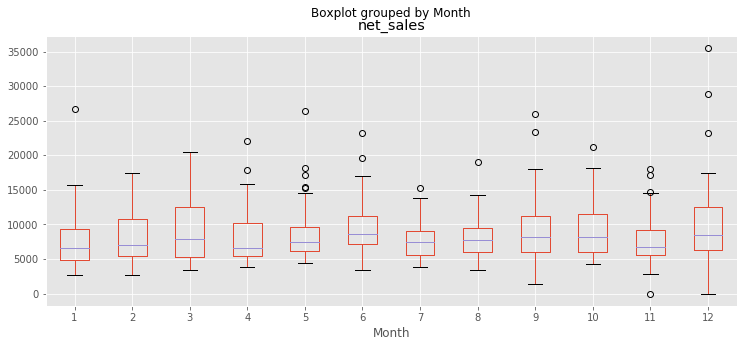

In [207]:
df.boxplot(column='net_sales',by='Month',figsize=(12,5));

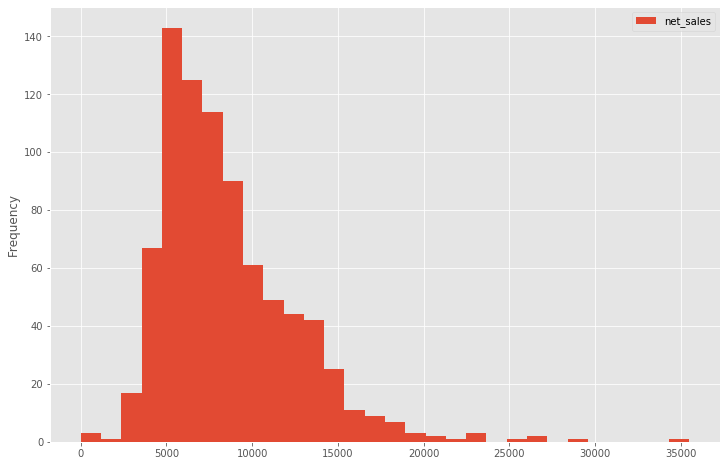

In [34]:
df.plot.hist(bins=30, figsize=(12,8));

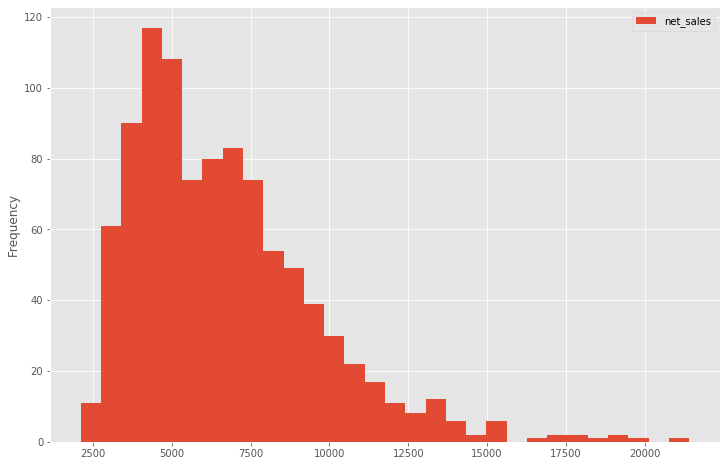

In [294]:
df_put.plot.hist(bins=30, figsize=(12,8));

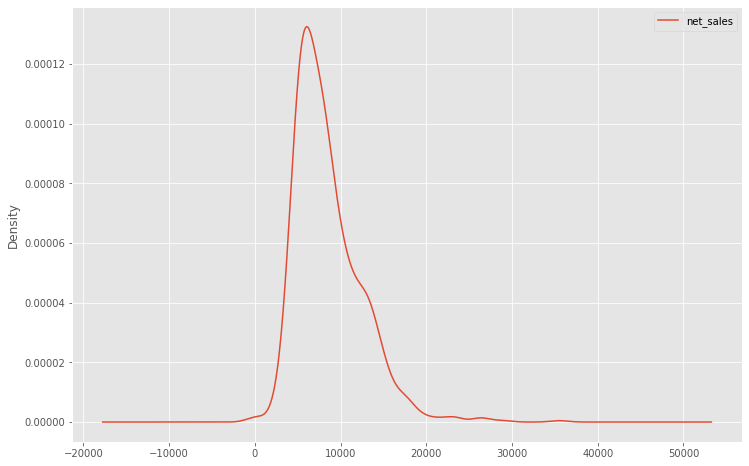

In [33]:
df.plot.kde(figsize=(12,8));

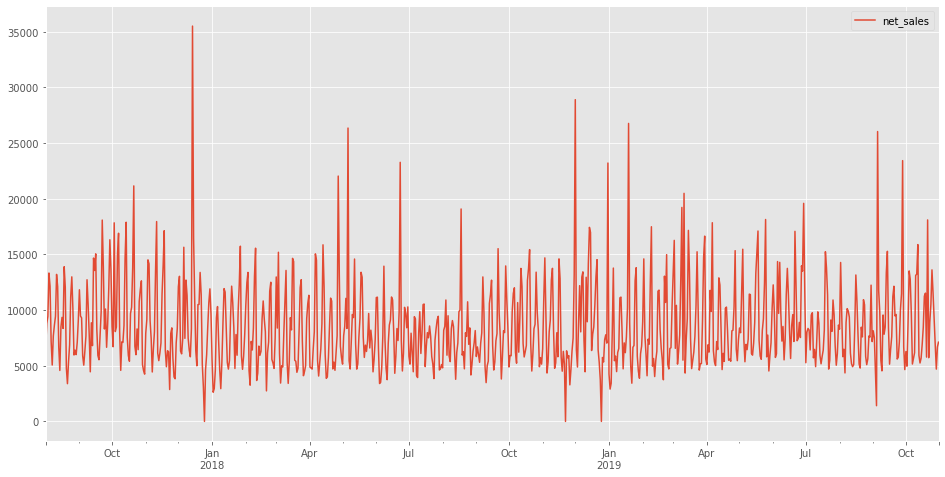

In [36]:
df.plot(figsize=(16,8));

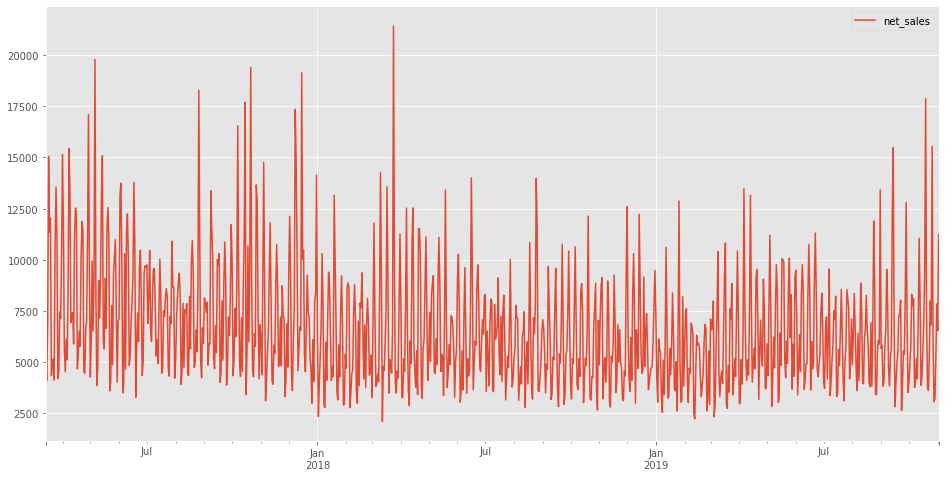

In [295]:
df_put.plot(figsize=(16,8));

In [37]:
monthly_sales = df.resample('m').sum()

In [159]:
weekly_sales = df.resample('w').sum()

In [162]:
weekly_sales.drop(['30_day_sales_mean','Month','natural_log'], axis=1, inplace=True)

In [184]:
weekly_sales.tail()

,net_sales
2019-09-29,70136.20
2019-10-06,60725.53
2019-10-13,65161.73
2019-10-20,54843.96
2019-10-27,77503.20


In [183]:
# remove last entry as it is incomplete
weekly_sales.drop(weekly_sales.tail(1).index,inplace=True)

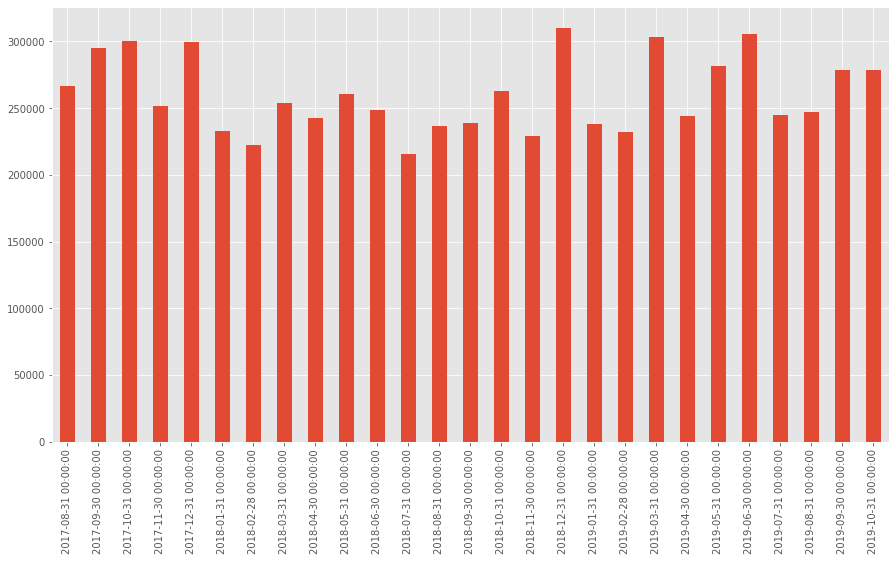

In [100]:
df['net_sales'].resample('M').sum().plot.bar(figsize=(15,8))

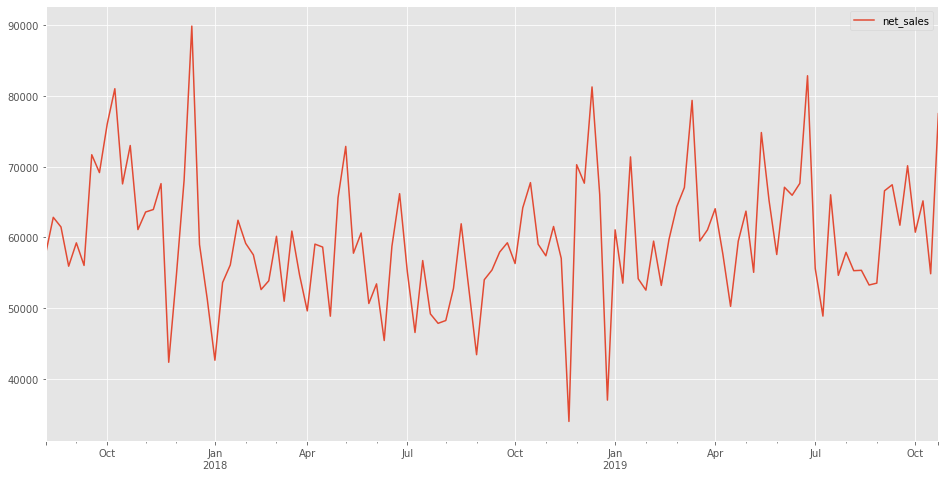

In [185]:
weekly_sales.plot(figsize=(16,8));

In [73]:
df['30_day_sales_mean'] = df['net_sales'].rolling(window=30).mean()

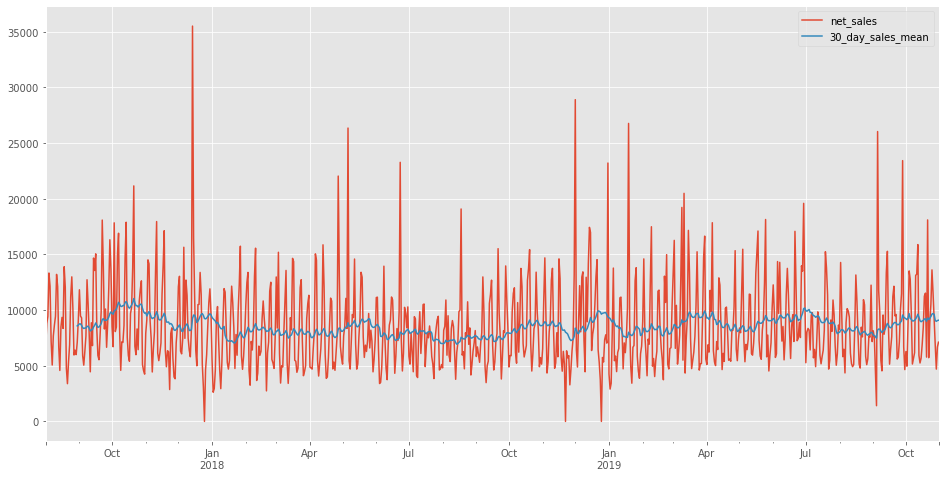

In [75]:
df[['net_sales','30_day_sales_mean']].plot(figsize=(16,8)).autoscale(axis='x',tight=True);

<Figure size 432x288 with 0 Axes>

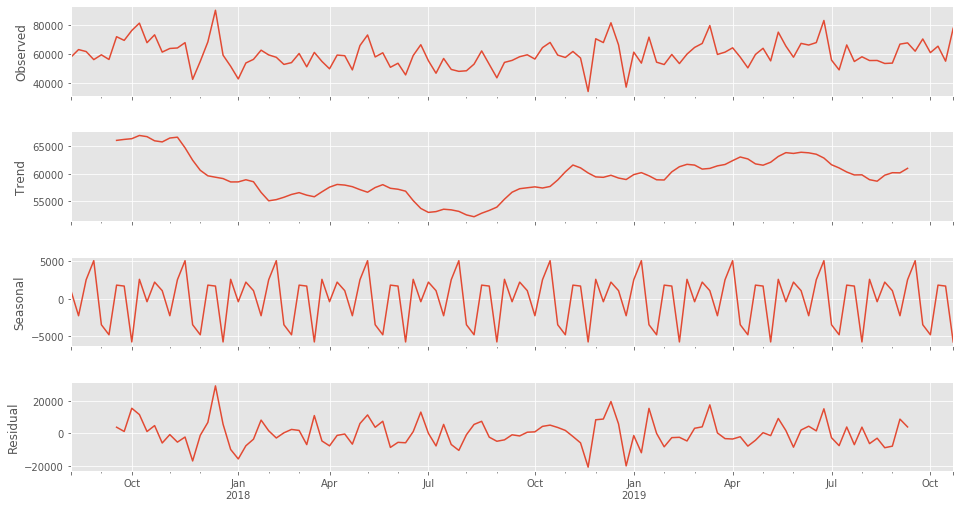

In [186]:
decomposition = seasonal_decompose(weekly_sales, freq=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8);

<Figure size 432x288 with 0 Axes>

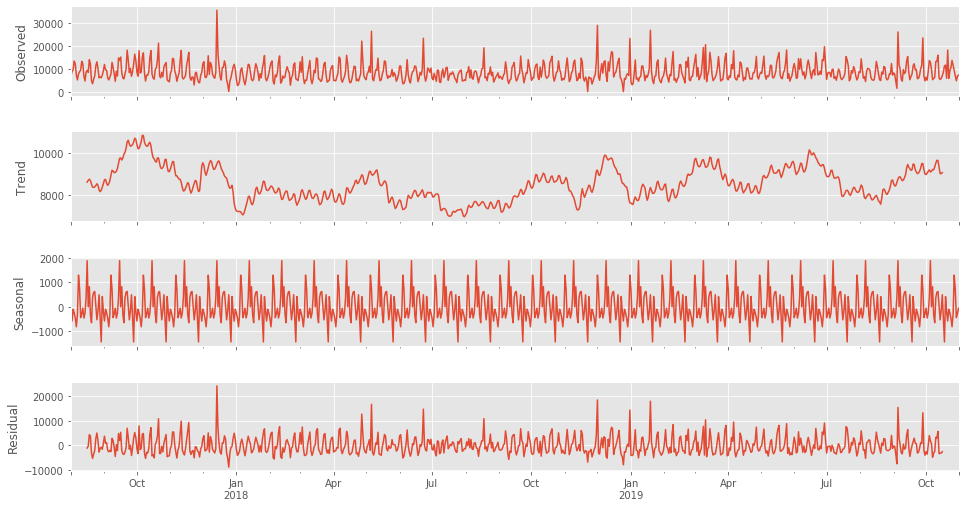

In [205]:
decomposition = seasonal_decompose(df['net_sales'], freq=30)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8);

<Figure size 432x288 with 0 Axes>

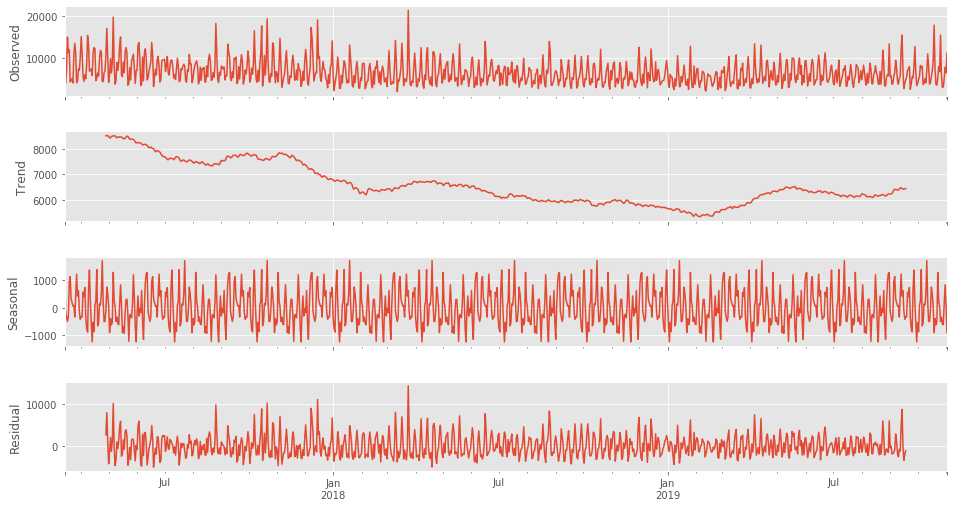

In [301]:
decomposition = seasonal_decompose(df_put['net_sales'], freq=90)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8);

<Figure size 432x288 with 0 Axes>

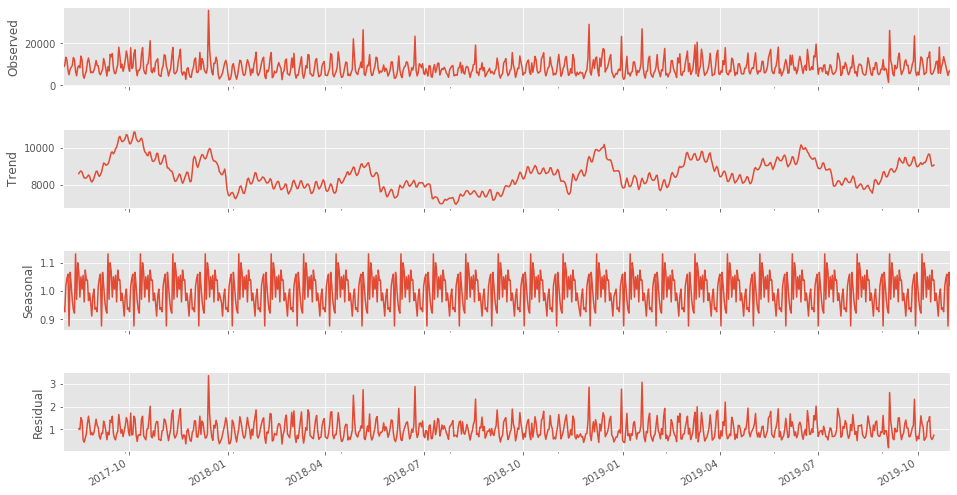

In [139]:
decomposition = seasonal_decompose(df1, freq=30, model='multiplicative')
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8);

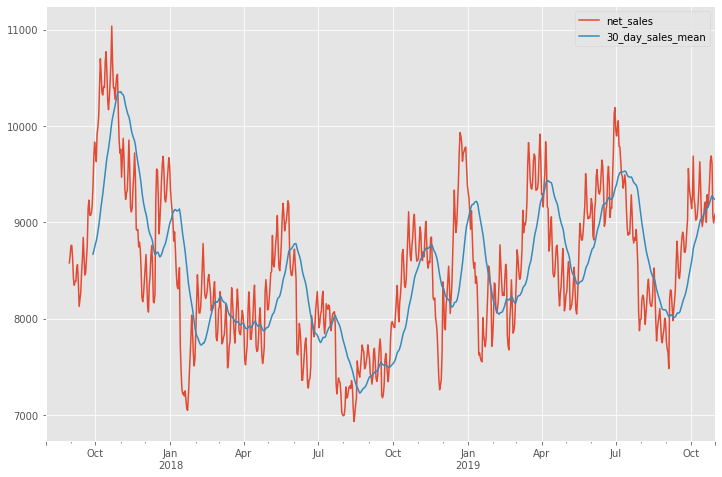

In [78]:
df.rolling(window=30).mean().plot(figsize=(12,8));

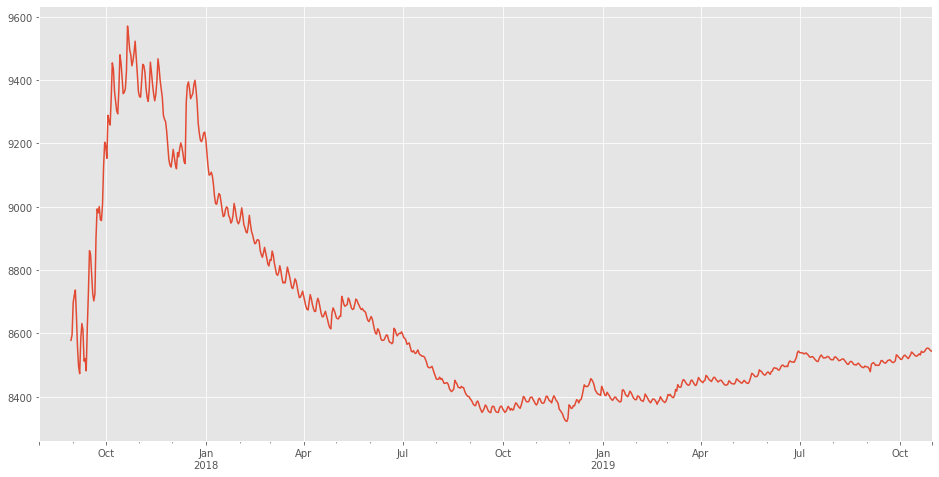

In [77]:
df['net_sales'].expanding(min_periods=30).mean().plot(figsize=(16,8));

In [101]:
#create a function that will help us to quickly 
def test_stationarity(timeseries, window):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(18, 8))
    orig = plt.plot(timeseries.iloc[window:], color='dodgerblue',label='Original')
    mean = plt.plot(rolmean, color='crimson', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.xticks(rotation='vertical')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

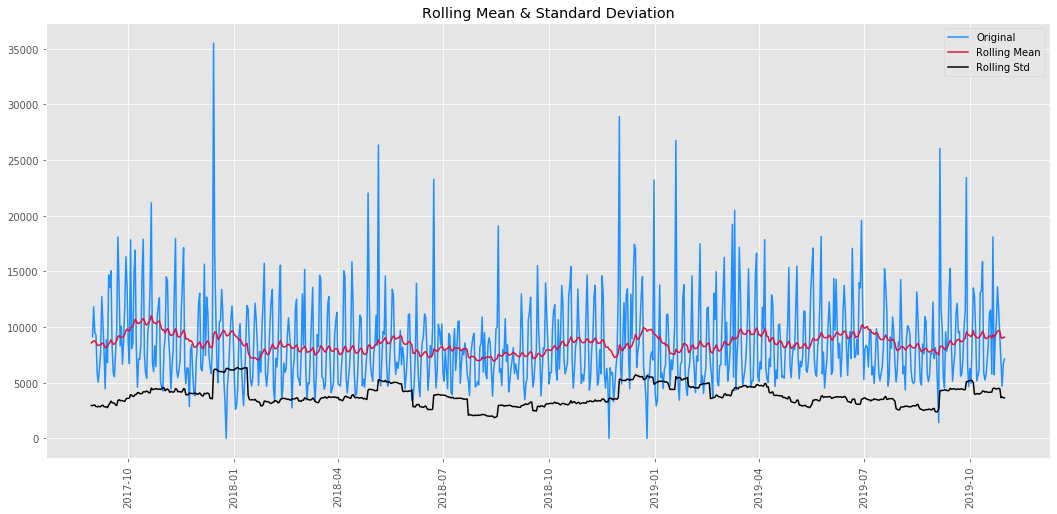

Results of Dickey-Fuller Test:
Test Statistic                  -5.331097
p-value                          0.000005
#Lags Used                      20.000000
Number of Observations Used    801.000000
Critical Value (1%)             -3.438540
Critical Value (5%)             -2.865155
Critical Value (10%)            -2.568695
dtype: float64


In [155]:
test_stationarity(df['net_sales'], 30)

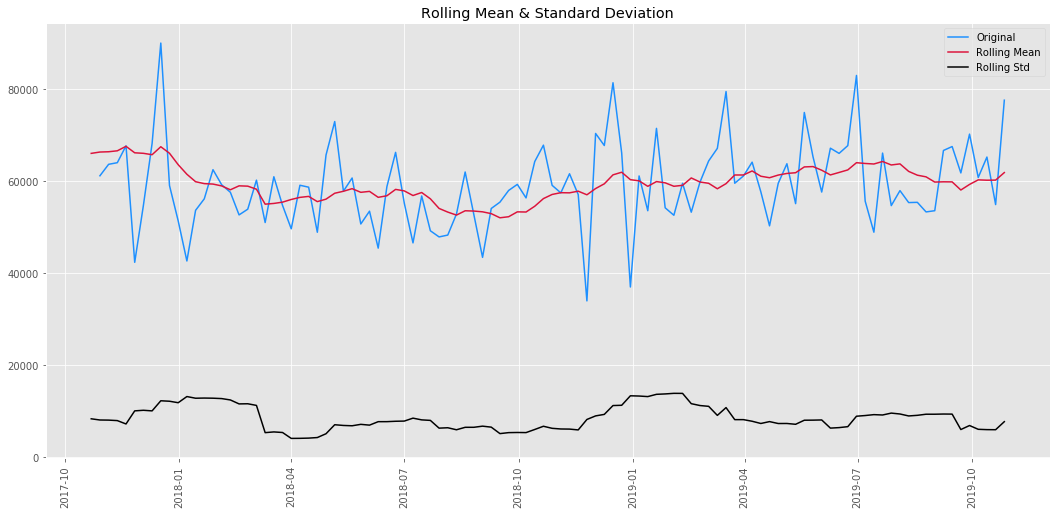

Results of Dickey-Fuller Test:
Test Statistic                -8.045370e+00
p-value                        1.800560e-12
#Lags Used                     0.000000e+00
Number of Observations Used    1.160000e+02
Critical Value (1%)           -3.488022e+00
Critical Value (5%)           -2.886797e+00
Critical Value (10%)          -2.580241e+00
dtype: float64


In [187]:
test_stationarity(weekly_sales['net_sales'], 12)

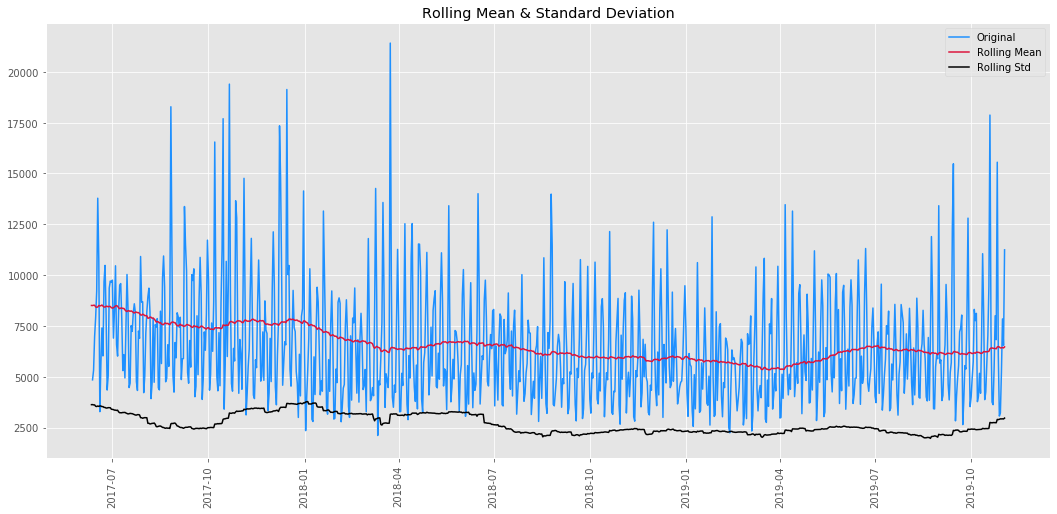

Results of Dickey-Fuller Test:
Test Statistic                  -3.067638
p-value                          0.029043
#Lags Used                      20.000000
Number of Observations Used    943.000000
Critical Value (1%)             -3.437304
Critical Value (5%)             -2.864610
Critical Value (10%)            -2.568405
dtype: float64


In [304]:
test_stationarity(df_put['net_sales'], 90)

In [191]:
len(weekly_sales)

117

# I'm skipping any stationarity steps for now
## Maybe come back to this!

# Weekly Sales

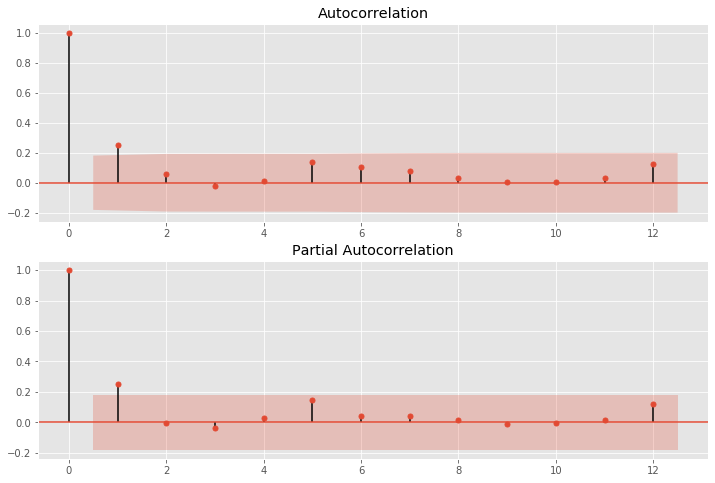

In [209]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(weekly_sales['net_sales'], lags=12, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(weekly_sales['net_sales'], lags=12, ax=ax2)

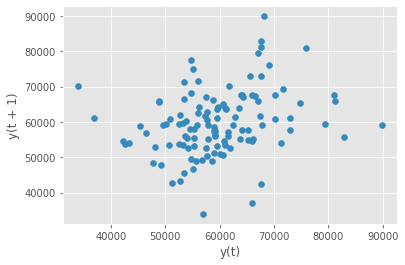

In [210]:
from pandas.plotting import lag_plot
lag_plot(weekly_sales['net_sales']);

# Daily Sales

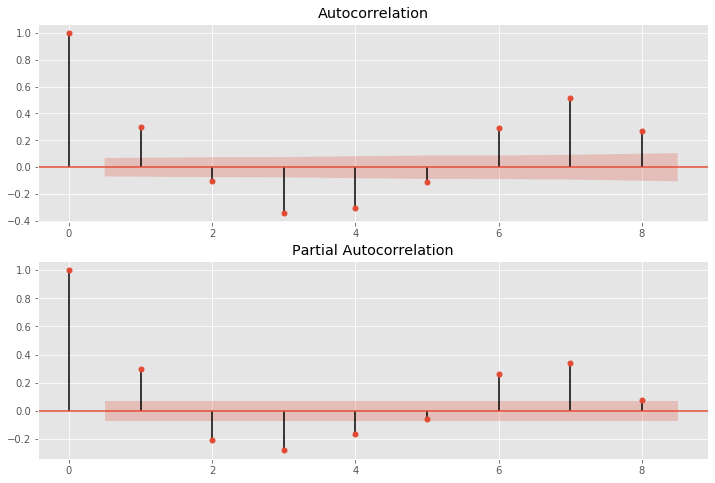

In [214]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(df1['net_sales'], lags=8, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(df1['net_sales'], lags=8, ax=ax2)

# Put Daily Sales

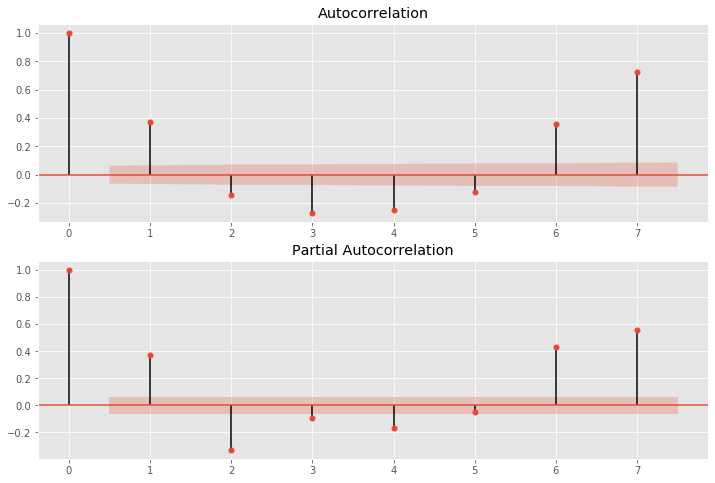

In [308]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(df_put['net_sales'], lags=7, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(df_put['net_sales'], lags=7, ax=ax2)

In [310]:
df_put.tail()

,net_sales,day_of_week
2019-10-29,3216.01,Tuesday
2019-10-30,5224.46,Wednesday
2019-10-31,7843.98,Thursday
2019-11-01,6539.28,Friday
2019-11-02,11242.04,Saturday


In [224]:
len(weekly_sales)

117

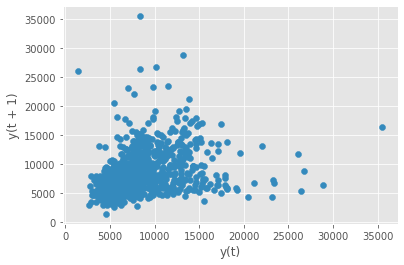

In [223]:
lag_plot(df1['net_sales']);

# AR model
## just to like, see.

In [231]:
# Set 12 wks for testing
train = weekly_sales.iloc[:12]
test = weekly_sales.iloc[12:]

In [232]:
model = AR(train['net_sales'])
AR1fit = model.fit(maxlag=1,method='mle')
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

Lag: 1
Coefficients:
const           29610.217293
L1.net_sales        0.550474
dtype: float64


In [233]:
# This is the general format for obtaining predictions
start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [234]:
predictions1

2017-10-29    69791.767561
2017-11-05    68028.747683
2017-11-12    67058.251662
2017-11-19    66524.019155
2017-11-26    66229.938227
2017-12-03    66068.054419
2017-12-10    65978.941646
2017-12-17    65929.887410
2017-12-24    65902.884345
2017-12-31    65888.019869
2018-01-07    65879.837366
2018-01-14    65875.333114
2018-01-21    65872.853642
2018-01-28    65871.488757
2018-02-04    65870.737425
2018-02-11    65870.323836
2018-02-18    65870.096166
2018-02-25    65869.970840
2018-03-04    65869.901851
2018-03-11    65869.863874
2018-03-18    65869.842969
2018-03-25    65869.831461
2018-04-01    65869.825127
2018-04-08    65869.821640
2018-04-15    65869.819720
2018-04-22    65869.818664
2018-04-29    65869.818082
2018-05-06    65869.817762
2018-05-13    65869.817585
2018-05-20    65869.817488
                  ...     
2019-04-07    65869.817370
2019-04-14    65869.817370
2019-04-21    65869.817370
2019-04-28    65869.817370
2019-05-05    65869.817370
2019-05-12    65869.817370
2

In [235]:
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test['net_sales'][i]}")

predicted=69791.76756, expected=61098.83
predicted=68028.74768, expected=63585.25
predicted=67058.25166, expected=63936.7
predicted=66524.01916, expected=67599.7
predicted=66229.93823, expected=42317.64
predicted=66068.05442, expected=54678.46
predicted=65978.94165, expected=68109.53
predicted=65929.88741, expected=89900.37
predicted=65902.88435, expected=58981.009999999995
predicted=65888.01987, expected=51312.43
predicted=65879.83737, expected=42604.45
predicted=65875.33311, expected=53599.06
predicted=65872.85364, expected=56094.47
predicted=65871.48876, expected=62419.43
predicted=65870.73742, expected=59145.09
predicted=65870.32384, expected=57515.96
predicted=65870.09617, expected=52605.90000000001
predicted=65869.97084, expected=53848.51
predicted=65869.90185, expected=60148.21000000001
predicted=65869.86387, expected=50952.05
predicted=65869.84297, expected=60885.939999999995
predicted=65869.83146, expected=54666.68
predicted=65869.82513, expected=49588.36
predicted=65869.82164

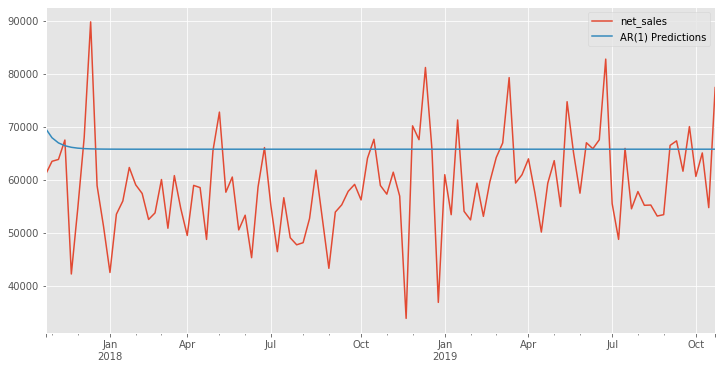

In [236]:
test['net_sales'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));

In [237]:
#fitting an AR2 model
AR2fit = model.fit(maxlag=2,method='mle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}')

Lag: 2
Coefficients:
const           21524.544329
L1.net_sales        0.412146
L2.net_sales        0.260363
dtype: float64


In [238]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

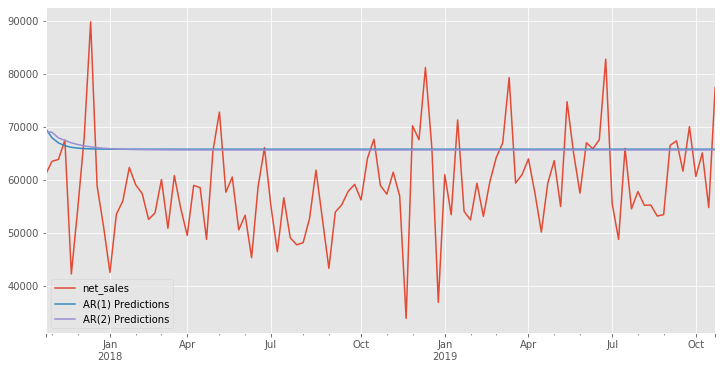

In [239]:
test['net_sales'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6));

In [246]:
ARfit = model.fit(maxlag=7,method='mle')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 7
Coefficients:
const           0.000006
L1.net_sales         NaN
L2.net_sales         NaN
L3.net_sales         NaN
L4.net_sales         NaN
L5.net_sales         NaN
L6.net_sales         NaN
L7.net_sales    0.935553
dtype: float64


In [247]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(11) Predictions'

predictions11 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

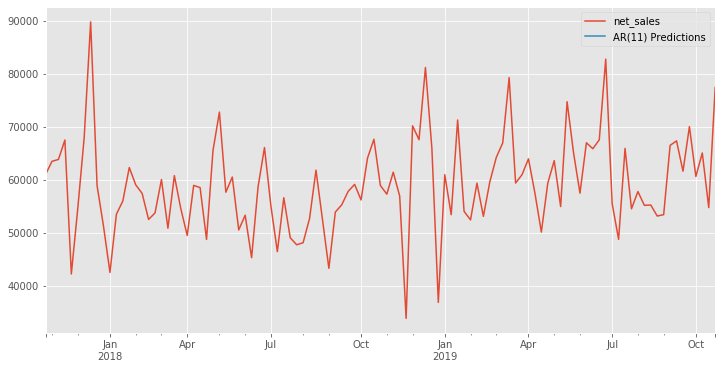

In [248]:
test['net_sales'].plot(legend=True)
# predictions1.plot(legend=True)
# predictions2.plot(legend=True)
predictions11.plot(legend=True,figsize=(12,6));

In [244]:
predictions11

2017-10-29   NaN
2017-11-05   NaN
2017-11-12   NaN
2017-11-19   NaN
2017-11-26   NaN
2017-12-03   NaN
2017-12-10   NaN
2017-12-17   NaN
2017-12-24   NaN
2017-12-31   NaN
2018-01-07   NaN
2018-01-14   NaN
2018-01-21   NaN
2018-01-28   NaN
2018-02-04   NaN
2018-02-11   NaN
2018-02-18   NaN
2018-02-25   NaN
2018-03-04   NaN
2018-03-11   NaN
2018-03-18   NaN
2018-03-25   NaN
2018-04-01   NaN
2018-04-08   NaN
2018-04-15   NaN
2018-04-22   NaN
2018-04-29   NaN
2018-05-06   NaN
2018-05-13   NaN
2018-05-20   NaN
              ..
2019-04-07   NaN
2019-04-14   NaN
2019-04-21   NaN
2019-04-28   NaN
2019-05-05   NaN
2019-05-12   NaN
2019-05-19   NaN
2019-05-26   NaN
2019-06-02   NaN
2019-06-09   NaN
2019-06-16   NaN
2019-06-23   NaN
2019-06-30   NaN
2019-07-07   NaN
2019-07-14   NaN
2019-07-21   NaN
2019-07-28   NaN
2019-08-04   NaN
2019-08-11   NaN
2019-08-18   NaN
2019-08-25   NaN
2019-09-01   NaN
2019-09-08   NaN
2019-09-15   NaN
2019-09-22   NaN
2019-09-29   NaN
2019-10-06   NaN
2019-10-13   N

### Well that kinda sucks

# Moving on to ARIMA!!

In [251]:
auto_arima(weekly_sales['net_sales'])

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(1, 0, 0),
      out_of_sample_size=0, scoring='mse', scoring_args=None,
      seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
      suppress_warnings=False, transparams=True, trend=None,
      with_intercept=True)

In [252]:
auto_arima(weekly_sales['net_sales']).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  117
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1229.551
Date:                Mon, 11 Nov 2019   AIC                           2465.103
Time:                        18:00:25   BIC                           2473.389
Sample:                             0   HQIC                          2468.467
                                - 117                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.433e+04   5521.943      8.028      0.000    3.35e+04    5.52e+04
ar.L1          0.2592      0.089      2.902      0.004       0.084       0.434
sigma2       7.92e+07      0.358   2.21e+08      0.000    7.92e+07    7.92e+07
===================================================================================
Ljung-Box (Q):                       21.05   Jarque-Bera (JB):                 4.43
Prob(Q):                              0.99   Prob(JB):                         0.11
Heteroskedasticity (H):               0.83   Skew:                             0.23
Prob(H) (two-sided):                  0.56   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.77e+24. Standard errors may be unstable.
"""

In [253]:
auto_arima(df['net_sales'])

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(3, 0, 3),
      out_of_sample_size=0, scoring='mse', scoring_args=None,
      seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
      suppress_warnings=False, transparams=True, trend=None,
      with_intercept=True)

In [254]:
stepwise_fit = auto_arima(weekly_sales['net_sales'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Fit ARIMA: order=(0, 0, 0); AIC=2470.928, BIC=2476.452, Fit time=0.004 seconds
Fit ARIMA: order=(1, 0, 0); AIC=2465.099, BIC=2473.386, Fit time=0.041 seconds
Fit ARIMA: order=(0, 0, 1); AIC=2465.574, BIC=2473.861, Fit time=0.050 seconds
Fit ARIMA: order=(2, 0, 0); AIC=2467.091, BIC=2478.140, Fit time=0.024 seconds
Fit ARIMA: order=(1, 0, 1); AIC=2467.092, BIC=2478.140, Fit time=0.170 seconds
Fit ARIMA: order=(2, 0, 1); AIC=2469.080, BIC=2482.890, Fit time=0.108 seconds
Total fit time: 0.401 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  117
Model:                     ARMA(1, 0)   Log Likelihood               -1229.550
Method:                       css-mle   S.D. of innovations           8863.867
Date:                Mon, 11 Nov 2019   AIC                           2465.099
Time:                        18:04:24   BIC                           2473.386
Sample:                             0   HQIC                          2468.463
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.988e+04   1100.835     54.394      0.000    5.77e+04     6.2e+04
ar.L1.y        0.2575      0.090      2.848      0.005       0.080       0.435
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.8829           +0.0000j            3.8829            0.0000
-----------------------------------------------------------------------------
"""

## So, ARMA?

In [256]:
model = ARMA(train['net_sales'],order=(1,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              net_sales   No. Observations:                   12
Model:                     ARMA(1, 0)   Log Likelihood                -122.755
Method:                       css-mle   S.D. of innovations           6600.196
Date:                Mon, 11 Nov 2019   AIC                            251.510
Time:                        18:09:08   BIC                            252.965
Sample:                    08-06-2017   HQIC                           250.972
                         - 10-22-2017                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6.584e+04   3947.640     16.679      0.000    5.81e+04    7.36e+04
ar.L1.net_sales     0.5618      0.238      2.356      0.040       0.094       1.029
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7801           +0.0000j            1.7801            0.0000
-----------------------------------------------------------------------------
"""

In [257]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end).rename('ARMA(2,2) Predictions')

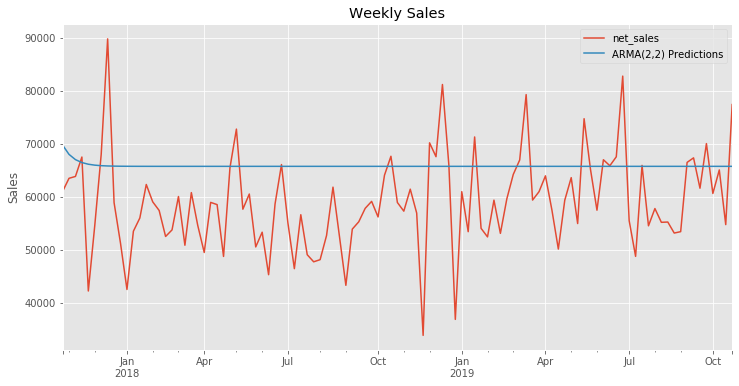

In [258]:
title = 'Weekly Sales'
ylabel='Sales'
xlabel='' # we don't really need a label here

ax = test['net_sales'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);